In [1]:
#Installations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore") 

import pandas as pd 
file = pd.read_csv("UpdatedDiabetes.csv")

file.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#Display the dataset size:
file.shape

(768, 10)

In [3]:
#Display feature information:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 60.1 KB


In [4]:
#Display descriptive statistics of the data set:
file.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Unnamed: 0,768.0,383.500000,221.846794,0.000,76.700,191.75000,383.5000,575.25000,690.3000,728.65000,759.33000,767.00
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [5]:
#Display the "distribution" of the outcome variable:
file["Outcome"].value_counts()*100/len(file)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [6]:
#Display the "classes" of the outcome variable:
file.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

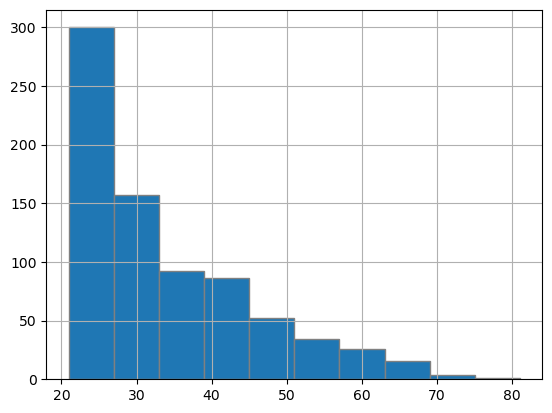

In [32]:
#Display a histagram of the "Age" variable:
file["Age"].hist(edgecolor = "gray");

In [33]:
#Display Max and Min Ages:
print("Max Age: " + str(file["Age"].max()) + " Min Age: " + str(file["Age"].min()))

Max Age: 81 Min Age: 21


<Axes: xlabel='BMI', ylabel='Density'>

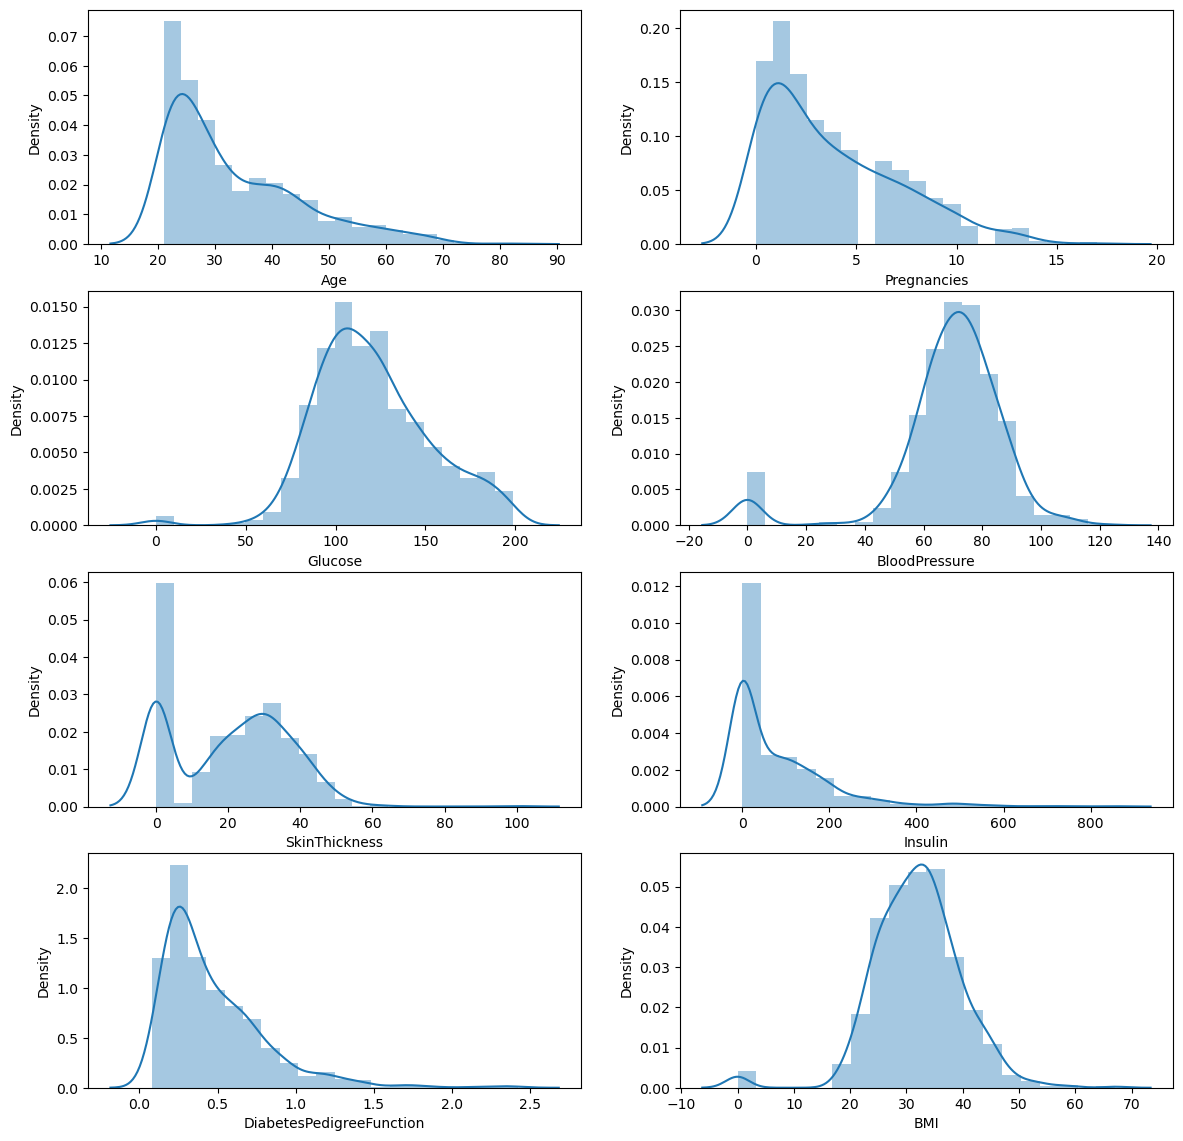

In [39]:
fig, ax = plt.subplots(4,2, figsize=(14,14))
sns.distplot(file.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(file.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(file.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(file.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(file.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(file.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(file.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(file.BMI, bins = 20, ax=ax[3,1]) 